In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Background

There are two groups of particles on the photo. The larger ones are the reference, and the smaller ones are the unknown. We know the size and statistics for the reference, so we can use that to calibrate for the size of the unknown.

## Basic workflow:

In [9]:
def imageProcess(photo):
    
    image = cv2.imread(photo)
#     image = cv2.resize(image_raw, None, fx=0.5,fy=0.5)
    image = cv2.GaussianBlur(image,(3,3),0)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    output = image.copy()
    processed = gray
    
    return output, processed

In [16]:
def detectParticle(processedPhoto, output, params):
    circles = cv2.HoughCircles(processedPhoto, 
                               cv2.HOUGH_GRADIENT,
                               dp = 1,
                               minDist = params['minDist'],
                               param1 = params['param1'],
                               param2 = params['param2'], 
                               minRadius = params['minRadius'], 
                               maxRadius = params['maxRadius']) 

    circles = circles[0, :]
    df_circles = pd.DataFrame(circles, columns=['x', 'y', 'r'])
    print(df_circles['r'].describe())

    plt.figure(figsize=(23,23))
    plt.imshow(output)
    fig = plt.gcf()
    ax = fig.gca()

    i = 0
    for (x, y, r) in circles:
        circle = plt.Circle((x, y), r, color='lightgreen', fill=False)
        ax.add_artist(circle)
        plt.text(x, y, i, color = 'yellow')
        i += 1
        
    return df_circles

In [14]:
output, processedPhoto = imageProcess('data/1.tif')

### Standard

count      7.000000
mean     108.985718
std        1.046311
min      107.099998
25%      108.750000
50%      109.300003
75%      109.300003
max      110.400002
Name: r, dtype: float64


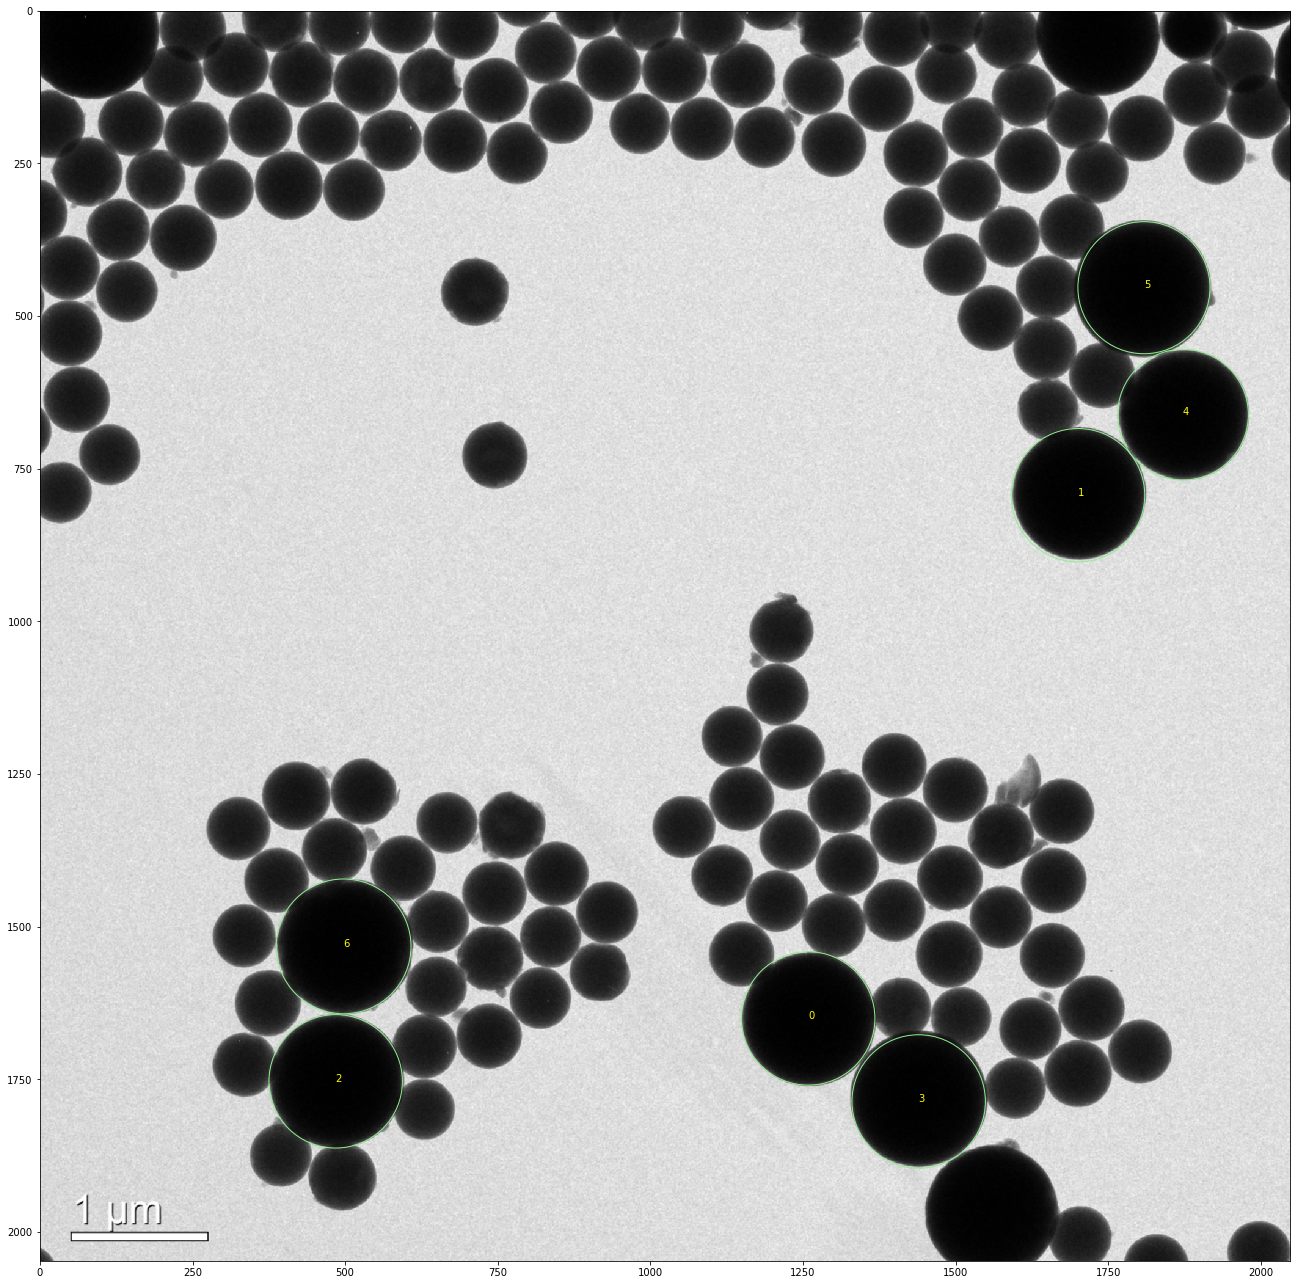

In [18]:
standardParam = {'minDist': 210 ,
                 'param1': 210,
                 'param2': 26,
                 'minRadius': 106,
                 'maxRadius': 111}

detectParticle(processedPhoto, output, standardParam);

### Unknown

count    114.000000
mean      52.524559
std        2.071106
min       48.400002
25%       50.825000
50%       53.049999
75%       54.200001
max       56.400002
Name: r, dtype: float64


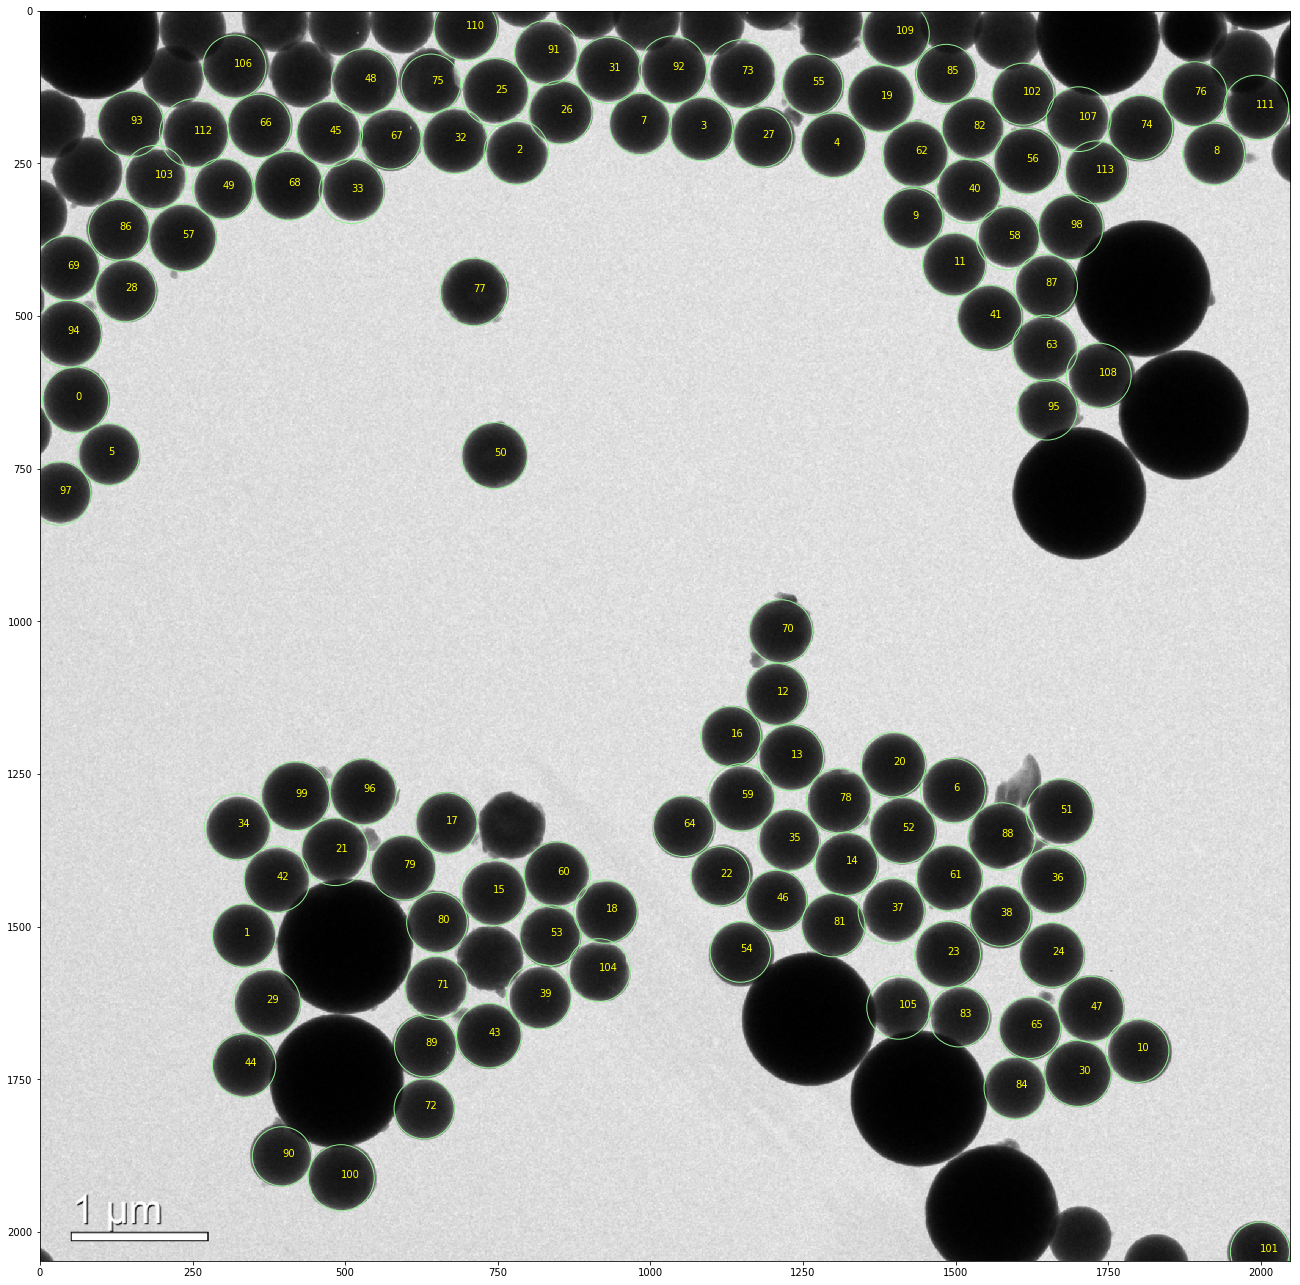

In [25]:
unknownParam = {'minDist': 90 ,
                 'param1': 210,
                 'param2': 26,
                 'minRadius': 47,
                 'maxRadius': 57}

detectParticle(processedPhoto, output, unknownParam);

In [298]:
output, processedPhoto = imageProcess('19.tif')
def paramEval(param1):
    standard = cv2.HoughCircles(processedPhoto, 
                               cv2.HOUGH_GRADIENT,
                               dp = 1,
                               minDist = 200,
                               param1 = param1,
                               param2 = 25, 
                               minRadius = 102, 
                               maxRadius = 111) 

    standard = standard[0, :]
    df_standard_19 = pd.DataFrame(standard, columns=['x', 'y', 'r'])
    count = df_standard_19['r'].describe()[0]
    mean = df_standard_19['r'].describe()[1]
    min_r = df_standard_19['r'].describe()[3]
    max_r = df_standard_19['r'].describe()[-1]
    
    plt.figure(figsize=(20,20))
    plt.imshow(output)
    fig = plt.gcf()
    ax = fig.gca()

    i = 0
    for (x, y, r) in standard:
        circle = plt.Circle((x, y), r, color='lightgreen', fill=False)
        ax.add_artist(circle)
        plt.text(x, y, i, color = 'yellow')
        i += 1
        
    return param1, count, mean, min_r, max_r